In [5]:
import pandas as pd 
from matplotlib import pyplot as plt
data=pd.read_csv('../data/raw/sample.csv')
cols=data.columns[2:]
print(data.head(),cols)


   Gesture Image Path       T0       T1       T2       T3    Thumb       I3  \
0  courser    ./1.png  432,352  414,343  402,316  415,295  435,296  417,278   
1  courser    ./2.png  431,357  413,343  402,315  415,296  434,295  418,279   
2  courser    ./3.png  431,357  413,343  402,315  415,297  434,295  418,279   
3  courser    ./4.png  447,405  428,390  423,357  442,339  461,335  436,323   
4  courser    ./5.png  445,327  424,314  412,276  427,248  450,243  423,248   

        I2       I1  ...       M1   Middle       R3       R2       R1  \
0  422,246  428,226  ...  430,298  424,308  452,291  453,291  438,313   
1  424,245  430,227  ...  428,298  424,309  450,296  451,289  437,312   
2  424,245  430,226  ...  428,298  423,309  450,296  451,288  437,312   
3  442,291  446,270  ...  455,322  450,339  474,343  477,329  462,349   
4  421,218  421,199  ...  434,257  433,273  456,261  460,241  446,269   

      Ring       L3       L2       L1   Little  
0  431,319  465,304  462,307  448,324

In [6]:
#preprocessing step
for col in cols:
    data[[col+'_x',col+'_y']]=data[col].str.split(',',expand=True,)
    data=data.astype({col+'_x':'float64',col+'_y':'float64'})
    data.drop(columns=[col],inplace=True)

data=data.drop_duplicates()

data['Image Path']=data['Image Path'].str[2:]
data.to_csv('../data/processed/motion.csv',index=False)

print(data.head())
print(cols)  



   Gesture Image Path   T0_x   T0_y   T1_x   T1_y   T2_x   T2_y   T3_x   T3_y  \
0  courser      1.png  432.0  352.0  414.0  343.0  402.0  316.0  415.0  295.0   
1  courser      2.png  431.0  357.0  413.0  343.0  402.0  315.0  415.0  296.0   
2  courser      3.png  431.0  357.0  413.0  343.0  402.0  315.0  415.0  297.0   
3  courser      4.png  447.0  405.0  428.0  390.0  423.0  357.0  442.0  339.0   
4  courser      5.png  445.0  327.0  424.0  314.0  412.0  276.0  427.0  248.0   

   ...  Ring_x  Ring_y   L3_x   L3_y   L2_x   L2_y   L1_x   L1_y  Little_x  \
0  ...   431.0   319.0  465.0  304.0  462.0  307.0  448.0  324.0     440.0   
1  ...   432.0   321.0  463.0  308.0  461.0  304.0  447.0  320.0     442.0   
2  ...   432.0   321.0  463.0  308.0  461.0  304.0  447.0  321.0     441.0   
3  ...   456.0   363.0  486.0  359.0  483.0  352.0  470.0  367.0     466.0   
4  ...   443.0   283.0  471.0  272.0  469.0  259.0  457.0  278.0     455.0   

   Little_y  
0     328.0  
1     327.0  
2 

In [7]:
from PIL import Image, ImageDraw

x=[col+'_x' for col in cols ]
y=[col+'_y' for col in cols ]
X1,Y2,Y1,X2=(data[x].min(axis=1)-20,
    data[y].max(axis=1)+20,
    data[y].min(axis=1)-20,
    data[x].max(axis=1)+20)
df=pd.concat([X1,X2,Y1,Y2],
    axis=1,
    )
df.columns=['X1','X2','Y1','Y2']
df['path']=data['Image Path']

for index, row in df.iterrows():
    img_path = '../data/raw/images/' + row['path']
    img = Image.open(img_path)
    cropped_img = img.crop((row['X1'], row['Y1'], row['X2'], row['Y2']))
    draw = ImageDraw.Draw(img)
    draw.rectangle([row['X1'], row['Y1'], row['X2'], row['Y2']], outline="red", width=3)
   
    cropped_img.save(f"../data/processed/images/{row['path']}")

df.to_csv('../data/processed/bounding_box.csv',index=False)
print(df.head(),df.shape)

      X1     X2     Y1     Y2   path
0  382.0  485.0  188.0  372.0  1.png
1  382.0  483.0  190.0  377.0  2.png
2  382.0  483.0  189.0  377.0  3.png
3  403.0  506.0  232.0  425.0  4.png
4  392.0  491.0  162.0  347.0  5.png (3415, 5)


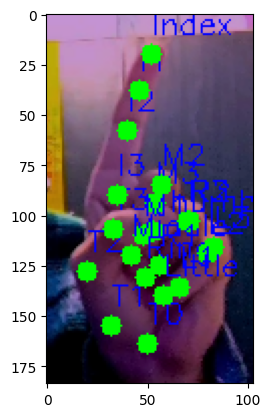

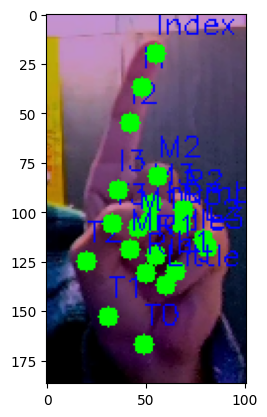

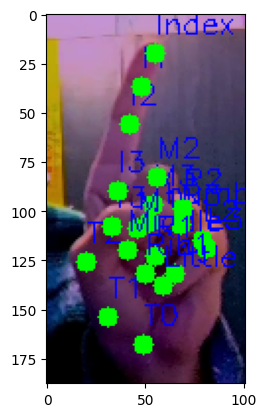

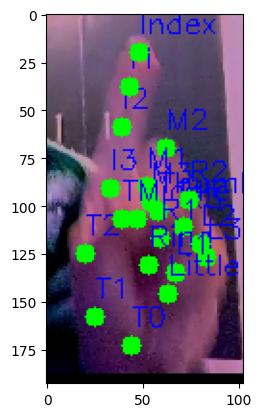

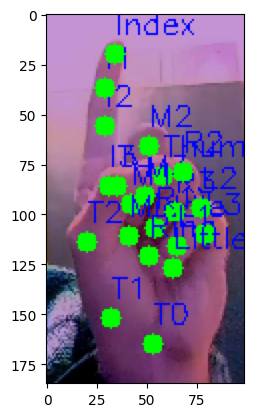

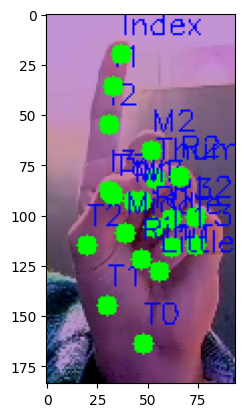

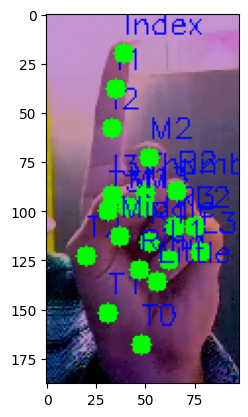

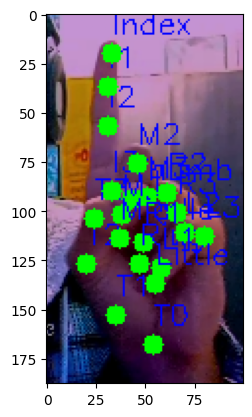

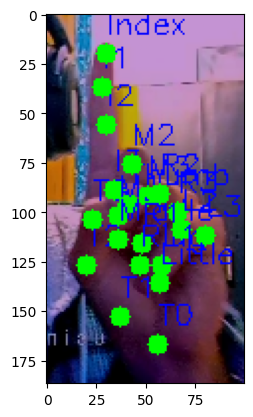

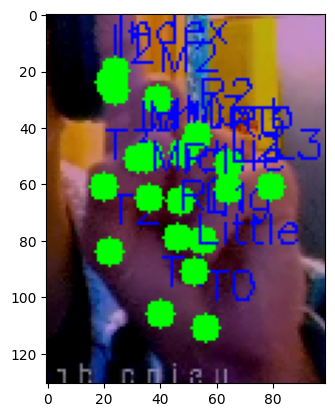

In [8]:
for img in data['Image Path'][:10]:
    plt.figure()
    img=plt.imread(r'../data/processed/images/'+img)
    plt.imshow(img)

In [9]:
data['Gesture']='cursor'
for col in cols:
    data[col+'_x'] = data[col+'_x'] - data[col+'_x'].mean()
    data[col+'_y'] = data[col+'_y'] - data[col+'_y'].mean()

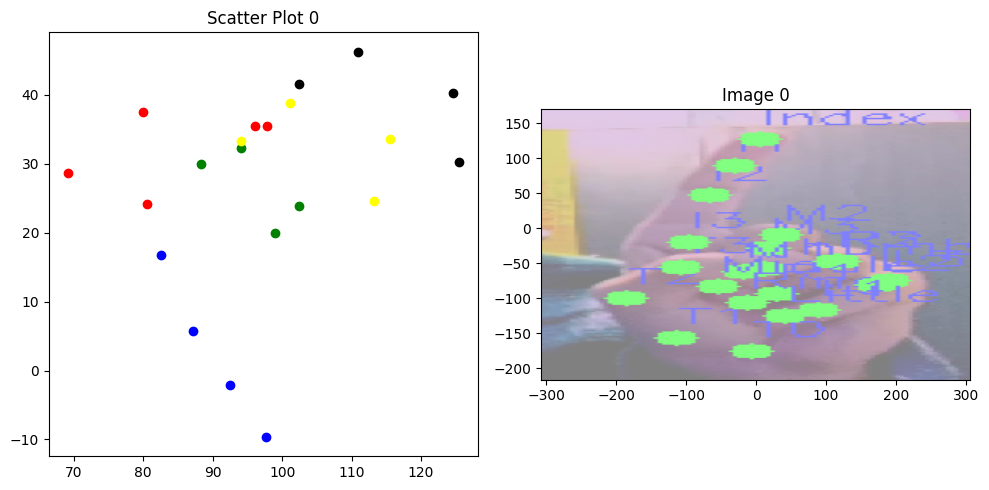

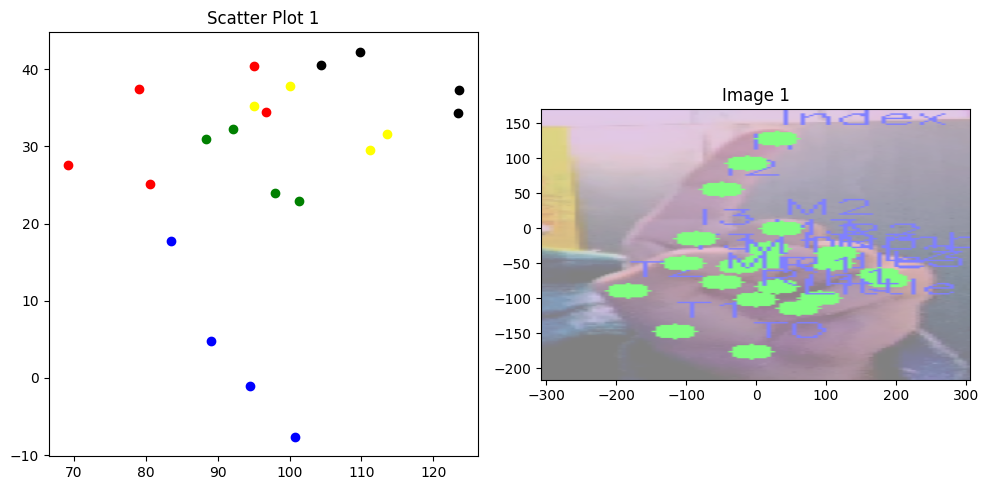

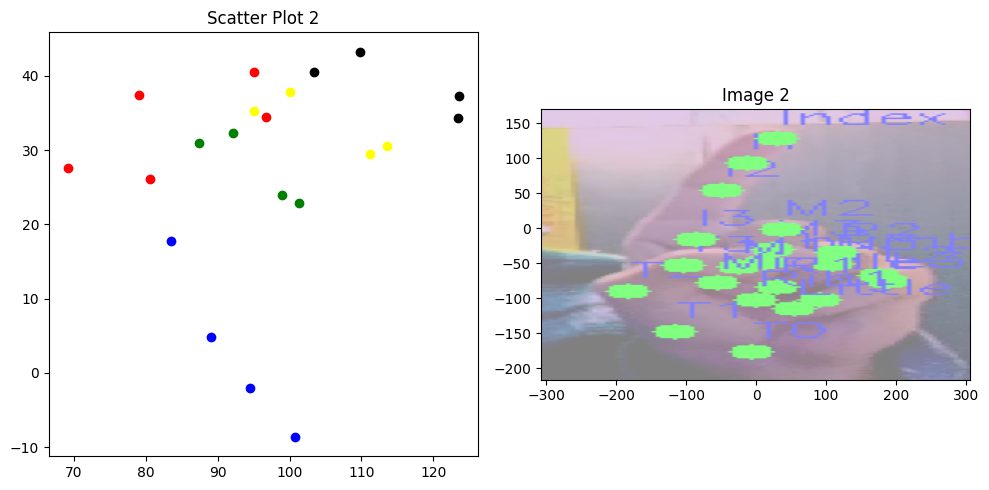

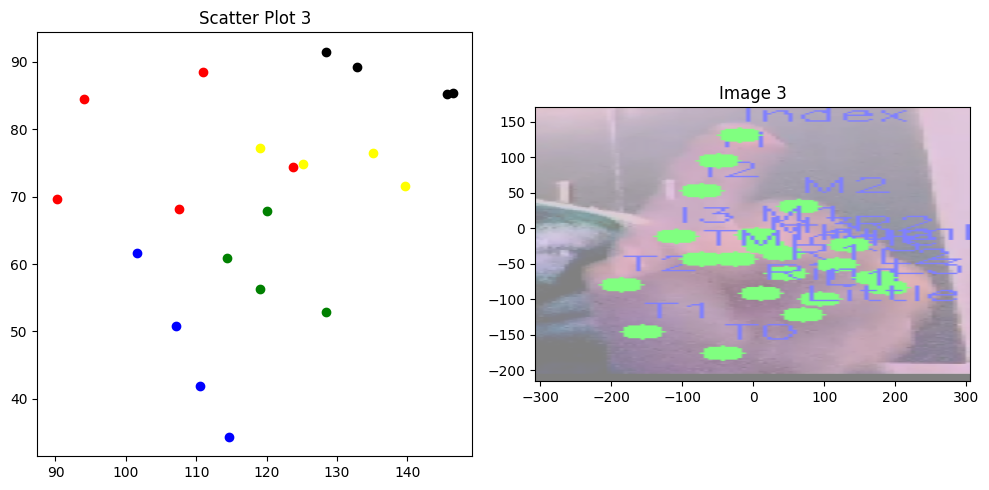

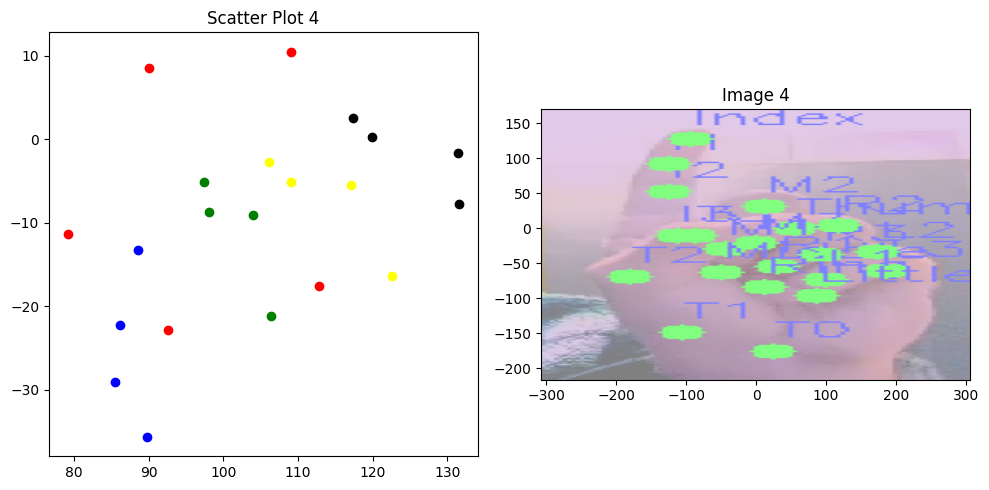

{'T': 'red', 'I': 'blue', 'M': 'green', 'R': 'yellow', 'L': 'black'}

In [10]:
    
from time import sleep

def scatter_plot():
 col_map={'T':'red','I':'blue','M':'green','R':'yellow','L':'black'} 
 for i in range(5):
    plt.figure(figsize=(10, 5))
    
    plt.subplot(1, 2, 1)
    for col in cols:
        plt.scatter(data.iloc[i][col+'_x'], data.iloc[i][col+'_y'], label=col,color=col_map[col[0]])

    plt.title(f'Scatter Plot {i}')
    img_path = '../data/processed/images/' + data.iloc[i]['Image Path']
    img = plt.imread(img_path)


    plt.subplot(1, 2, 2)
    # Calculate the bounding box based on min and max of col_x and col_y
    min_x, max_x = data[[col+'_x' for col in cols]].min().min(), data[[col+'_x' for col in cols]].max().max()
    min_y, max_y = data[[col+'_y' for col in cols]].min().min(), data[[col+'_y' for col in cols]].max().max()
    plt.imshow(img, extent=[min_x, max_x, min_y, max_y], alpha=0.5)
    plt.title(f'Image {i}')
    
    plt.tight_layout()
    plt.show()
    
scatter_plot()

{'T':'red','I':'blue','M':'green','R':'yellow','L':'black'}


  Gesture Image Path      T0_x      T0_y      T1_x      T1_y      T2_x  \
0  cursor      1.png  0.658824  0.635135  0.617769  0.639175  0.617476   
1  cursor      2.png  0.656863  0.652027  0.615702  0.639175  0.617476   
2  cursor      3.png  0.656863  0.652027  0.615702  0.639175  0.617476   
3  cursor      4.png  0.688235  0.814189  0.646694  0.800687  0.658252   
4  cursor      5.png  0.684314  0.550676  0.638430  0.539519  0.636893   

       T2_y      T3_x      T3_y  ...    Ring_x    Ring_y      L3_x      L3_y  \
0  0.597270  0.645338  0.573333  ...  0.642447  0.648829  0.702277  0.588997   
1  0.593857  0.645338  0.576667  ...  0.644359  0.655518  0.698774  0.601942   
2  0.593857  0.645338  0.580000  ...  0.644359  0.655518  0.698774  0.601942   
3  0.737201  0.694698  0.720000  ...  0.690249  0.795987  0.739054  0.766990   
4  0.460751  0.667276  0.416667  ...  0.665392  0.528428  0.712785  0.485437   

       L2_x      L2_y      L1_x      L1_y  Little_x  Little_y  
0  0.68846

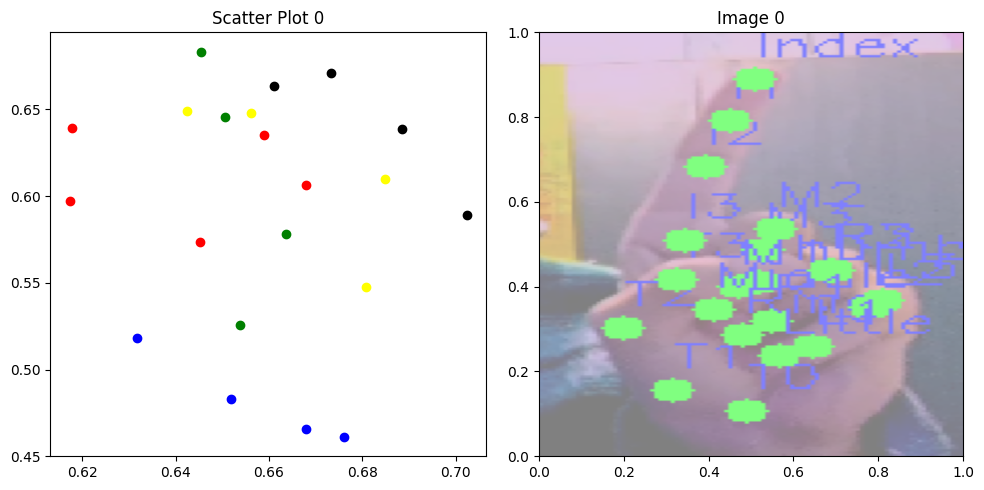

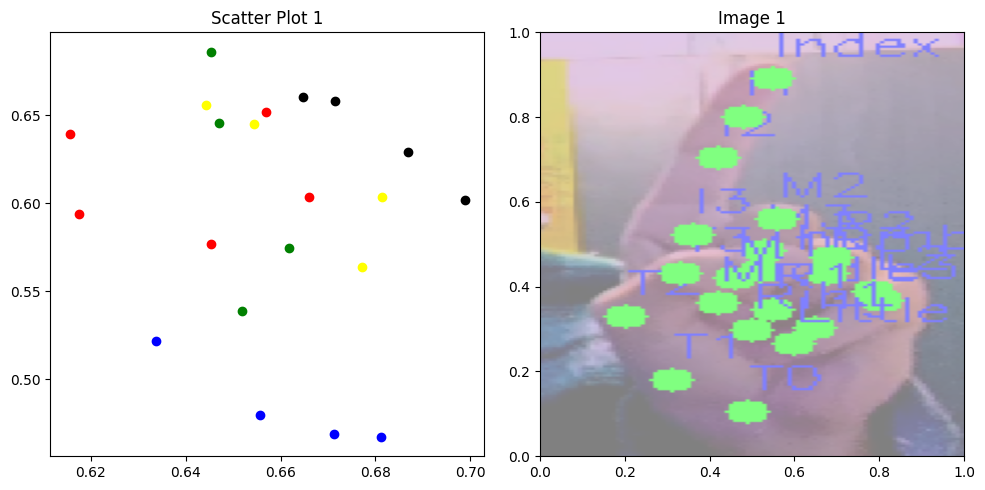

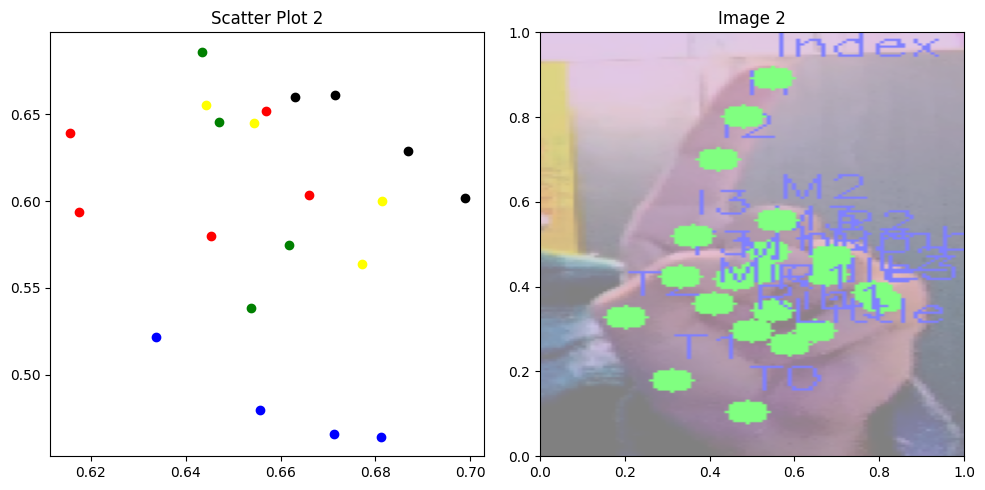

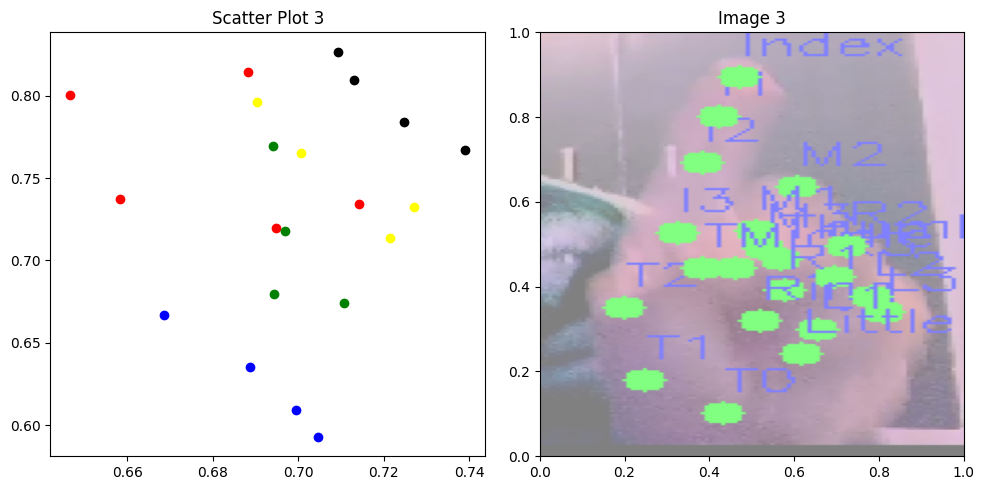

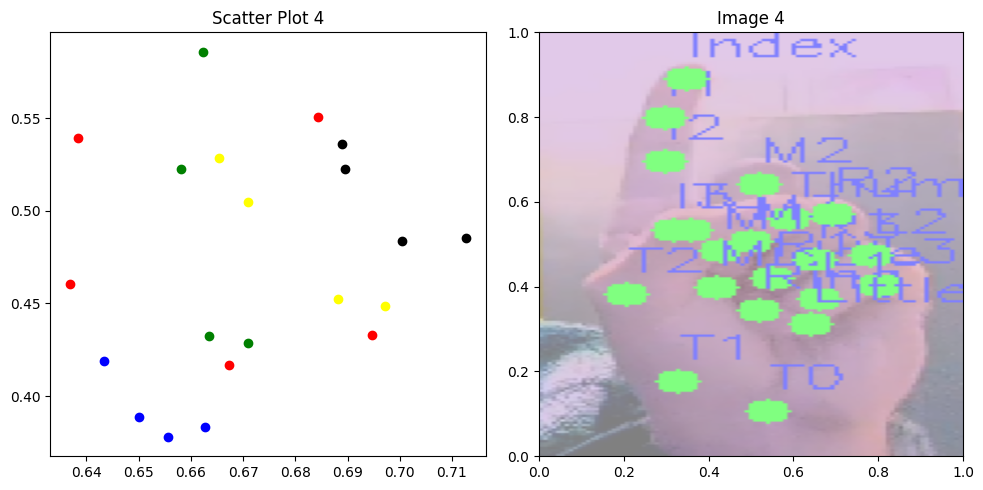

In [11]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
for col in cols:
    data[[col+'_x', col+'_y']] = scaler.fit_transform(data[[col+'_x', col+'_y']])

print(data.head())
scatter_plot()

In [12]:
data.to_csv('../data/processed/sample.csv',index=False)